This is doing exactly the same as its counter part, the only difference is that it is done on FRG which has no BCG counterpart. Results from this need to be added manually (or script it) to the rest

------

# Find places where there are mice in the background and save it/pass it

## Instructions

This file has to be located in the same folder as the BACKGROUND images, it assumes so. Once it is there, open it and run (either with CTRL+Enter or by clicking on the black triangle with the label *Run* 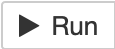 when they are selected) the cells below in the following order:

1. first run the cell right below, it starts with `import matplotlib.pyplot as plt`
2. then the three below, it's just checks. First should give you a name, second starts with `for j, name in enumerate(files_bcg[:10]):` and should hopefully give 10 lines with `Matrix shape: (2048, 2048)` and the last is the code itself, it's a long code. Now this is important. Once you run it (if it doesn't give an error), it's gonna go over all files in the directory, loads them and looks for positions with mice. If it *thinks* there is a mouse, it will print the mouse number, slot, name and most importantly, the **unique_label**. Further more, it will also show the position, ie show the mouse (in the better case). Your task is to go over all those images and check that it actually shows a mouse and not some noise or some random nonsense. THIS IS VERY IMPORTANT! It's gonna take a while but I believe it's gonna go much faster than you checking it, so do not worry. Once you find some bad image, copy the **unique_label** and save it into your prepared xlsx file named *remove.xlsx* which is also in the directory. Put this label into a row in the column named *unique_labels*. Once you're done with that -- once you reach the end -- go to point 3. By now there will be already a csv file with all the relevant details.
3. Once you have done this and SAVED the remove.xlsx file, run the next starting with `bad_slots = pd.read_excel('./remove.xlsx')`. This piece will remove the bad ones from the list of all meaning they will not be processed later.
4. Congratulations, you're done. There will be in your folder 2 csv files, one the original, one the cleaned one. Send me both.


-------
# 

# 
-----

# Run the full dataset

In [4]:
import h5py
import os, sys
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Importing module for functions
functions_modul =  "./functions"
sys.path.insert(0, functions_modul)

from load_h5_into_np import load_h5_into_np

# load example files
file_path_bcg = "./"
files_frg = [x for x in os.listdir(file_path_frg) if x.endswith(".h5")]

# load only the names which are missing -- USER HAS TO SUPPLY
missing_frg = pd.read_csv('./mice_idx/frg_without_brg.csv')["name"].values

In [12]:
# look up all the file names which we need to check
to_do_files = []
for a in missing_frg:
    print([x for x in files_frg if a in x])
    to_do_files.append([x for x in files_frg if a in x][0])
    
to_do_files    

['im399_streda_12_cy7_vsechny_p_bok_48h_2020-09-11_09-36-31-MWL-Ex(750)-Em(830).h5']
['im100_pondeli_02_i1_polymer_vsechny_p_bok_d150_2021-02-04_10-06-40-MWL-Ex(750)-Em(830).h5']


['im399_streda_12_cy7_vsechny_p_bok_48h_2020-09-11_09-36-31-MWL-Ex(750)-Em(830).h5',
 'im100_pondeli_02_i1_polymer_vsechny_p_bok_d150_2021-02-04_10-06-40-MWL-Ex(750)-Em(830).h5']

---
Mice naming

To be consistent, each mouse will get a name in the following manner:

*type_mX_imYYY_slotI*

where X will be either its name (1,2,3) or its order if all are present (first, second, third), imYYY is the unique number to the file generated during conversion, type is the treatment and slot I is the slot where the mouse is. The rest will be obtained through other functions.

In [13]:
for j, name in enumerate(to_do_files):
    # load the arr
    tmp_arr = load_h5_into_np(os.path.join(file_path_frg, name))

Matrix shape: (2048, 2048)
Matrix shape: (1024, 1024)


Matrix shape: (2048, 2048)
mean  27.774767


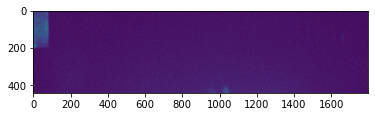

-->  Mouse 0 slot 0 name im399_streda_12_cy7_vsechny_p_bok_48h_2020-09-11_09-36-31-MWL-Ex(750)-Em(830).h5
ID: cy7_mp_im399_slot0

mean  391.5276


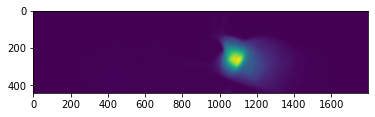

-->  Mouse 0 slot 1 name im399_streda_12_cy7_vsechny_p_bok_48h_2020-09-11_09-36-31-MWL-Ex(750)-Em(830).h5
ID: cy7_mp_im399_slot1

mean  580.84143


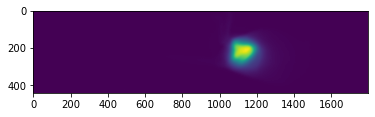

-->  Mouse 0 slot 2 name im399_streda_12_cy7_vsechny_p_bok_48h_2020-09-11_09-36-31-MWL-Ex(750)-Em(830).h5
ID: cy7_mp_im399_slot2

mean  61.297646


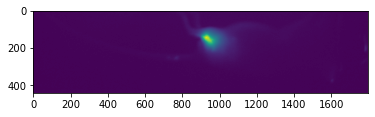

-->  Mouse 0 slot 3 name im399_streda_12_cy7_vsechny_p_bok_48h_2020-09-11_09-36-31-MWL-Ex(750)-Em(830).h5
ID: cy7_mp_im399_slot3

mean  20.625416


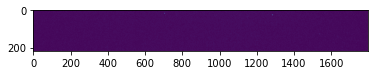

-->  Mouse 0 slot 4 name im399_streda_12_cy7_vsechny_p_bok_48h_2020-09-11_09-36-31-MWL-Ex(750)-Em(830).h5
ID: cy7_mp_im399_slot4

Matrix shape: (1024, 1024)


In [15]:
off = 70 # offset for mice positions
background = 10 # threshold for selecting a mouse, arbitrary, mouse is always above this, noise always below, still needs eye-check
df = pd.DataFrame(
    columns=[
        "name",
        "unique_label",
        "slot",
        "type"
    ])

for j, name in enumerate(to_do_files):
    # load the arr
    tmp_arr = load_h5_into_np(os.path.join(file_path_frg, name))
    # loop only over correct shape
    if tmp_arr.shape == (2048, 2048):
        for i in range(5):
            y = tmp_arr[off + (440 * i) : off + (440 * (i + 1)), 250:]
            print("mean ", y.mean())
            if y.mean()> background:
#                 plt.imshow(y > background)
                plt.imshow(y)
                plt.show()
                # create unique label
                k = name.split("_")[5][-1] #int(name.split("_")[5][-1])
                unique_label = name.split("_")[3]+ "_m" + str(k)+ "_"+ name.split("_")[0]+ "_slot"+ str(i)
                print(f"-->  Mouse {j} slot {i} name {name}\nID: {unique_label}\n")
                # update the dataframe
                df = df.append(
                    {   "name": name,
                        "unique_label": unique_label,
                        "slot": i,
                        "type": name.split("_")[3],
                    },
                    ignore_index=True,
                )

# df.to_csv('./good_mice_idx.csv', index=False)                
# check if unique label is unique
# if len(df.unique_label.unique()) != len(???)

In [16]:
df

,name,unique_label,slot,type
0,im399_streda_12_cy7_vsechny_p_bok_48h_2020-09-...,cy7_mp_im399_slot0,0,cy7
1,im399_streda_12_cy7_vsechny_p_bok_48h_2020-09-...,cy7_mp_im399_slot1,1,cy7
2,im399_streda_12_cy7_vsechny_p_bok_48h_2020-09-...,cy7_mp_im399_slot2,2,cy7
3,im399_streda_12_cy7_vsechny_p_bok_48h_2020-09-...,cy7_mp_im399_slot3,3,cy7
4,im399_streda_12_cy7_vsechny_p_bok_48h_2020-09-...,cy7_mp_im399_slot4,4,cy7


In [ ]:
bad_slots = pd.read_excel('./remove.xlsx')
df[~df.unique_label.isin(bad_slots.unique_labels)].to_csv('./good_mice_idx_cleaned.csv', index=False)

In [ ]:
%load_ext watermark

%watermark -a 'Jan Kadlec' -nmvu -iv